In [1]:
import numpy as np
import torch

In [2]:
array = np.load('data/slice_1.npy')

In [3]:
tensor = torch.tensor(array)


In [4]:
print(array)

[[-0.00392157 -0.00392157]
 [-0.00392157 -0.00392157]
 [ 0.00392157 -0.00392157]
 ...
 [ 0.37254902  0.2       ]
 [-0.0745098  -0.30980392]
 [-0.10588235  0.36470588]]


In [5]:
print("Converted PyTorch tensor:")
print(tensor)

Converted PyTorch tensor:
tensor([[-0.0039, -0.0039],
        [-0.0039, -0.0039],
        [ 0.0039, -0.0039],
        ...,
        [ 0.3725,  0.2000],
        [-0.0745, -0.3098],
        [-0.1059,  0.3647]], dtype=torch.float64)


In [6]:
import matplotlib.pyplot as plt


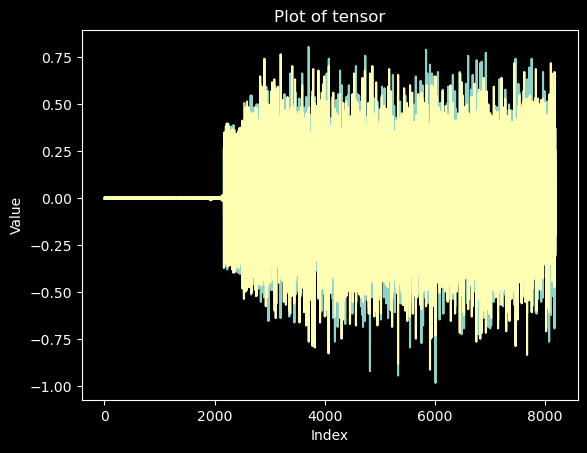

In [7]:
array_back = tensor.numpy()

# Plot the array
plt.plot(array_back)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of tensor')
plt.show()